## Fire Alarm Prediction Using Machine Learning

### Introduction
Introduction:
Addressing class imbalance is a critical challenge in many machine learning applications, where the distribution of classes in the dataset is skewed, leading to biased model performance. In this project, we explore the impact of data normalization, feature selection, and data resampling techniques on improving the performance of machine learning models in the context of imbalanced datasets. We aim to enhance the models' ability to generalize and make accurate predictions across different scenarios by employing these strategies.

The first objective of this study is to evaluate the effectiveness of data normalization in standardizing the dataset's features, thereby ensuring that each feature contributes equally to the model training process. We employ the StandardScaler to normalize the data and assess its impact on model performance. Additionally, we investigate the utility of feature selection techniques in reducing the dimensionality of the dataset while preserving its discriminatory power. We aim to streamline the model training process by selecting a subset of informative features and potentially improve computational efficiency.

Furthermore, we address the class imbalance challenge by employing data resampling techniques such as oversampling and undersampling to rebalance the distribution of classes in the dataset. By generating synthetic samples or subsampling the majority class, we aim to provide the models with a more balanced training set, thereby mitigating the bias towards the majority class. Through a comprehensive evaluation of various machine learning algorithms before and after applying these preprocessing techniques, we aim to provide insights into practical strategies for improving model performance on imbalanced datasets.

### Load Required Python Library

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display, HTML
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')

### Read And Analyze Data

In [2]:
# Load dataset
df = pd.read_pickle("smoke_detection_iot_cleaned.pkl")
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,DateTime
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:51
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:52
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:53
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:54
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 00:08:55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Temperature[C]  62630 non-null  float64       
 1   Humidity[%]     62630 non-null  float64       
 2   TVOC[ppb]       62630 non-null  int64         
 3   eCO2[ppm]       62630 non-null  int64         
 4   Raw H2          62630 non-null  int64         
 5   Raw Ethanol     62630 non-null  int64         
 6   Pressure[hPa]   62630 non-null  float64       
 7   PM1.0           62630 non-null  float64       
 8   PM2.5           62630 non-null  float64       
 9   NC0.5           62630 non-null  float64       
 10  NC1.0           62630 non-null  float64       
 11  NC2.5           62630 non-null  float64       
 12  Fire Alarm      62630 non-null  int64         
 13  DateTime        62630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(5)
memory usag

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],62630.0,15.970424,14.359576,-22.010,10.99425,20.130,25.4095,59.930
Humidity[%],62630.0,48.539499,8.865367,10.740,47.53000,50.150,53.2400,75.200
TVOC[ppb],62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
eCO2[ppm],62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
Raw H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
Raw Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Pressure[hPa],62630.0,938.627649,1.331344,930.852,938.70000,938.816,939.4180,939.861
PM1.0,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
PM2.5,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
NC0.5,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030


In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 62630  │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 14     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Temperature[C]       │    0 │      0 │      16 │     14 │     -22 │      11 │      25 │      60 │   ▁▂▃█   │  │
│ │ Humidity[%]          │    0 │      0 │      49 │    8.9 │      11 │      48 │      53 │      75 │  ▁ ▁█▂   │  │
│ │ TVOC[ppb]            │    0 │      0 │    1900 │   7800 │       0 │     130 │    1200 │   60000 │    █     │  │
│ │ eCO2[ppm]            │    0 │      0 │     670 │   1900 │     400 │     400 │     440 │   60000 │    █     │  │
│ │ Raw H2               │    0 │      0 │   13000 │    270 │   11000 │   13000 │   13000 │   14000 │      █   │  │
│ │ Raw Ethanol          │    0 │      0 │   20000 │    610 │   15000 │   19000 │   20000 │   21000 │      █▁  │  │
│ │ Pressure[hPa]        │    0 │      0 │     940 │    1.3 │     930 │     940 │     940 │     940 │      ▂█  │  │
│ │ PM1.0                │    0 │      0 │     100 │    920 │       0 │     1.3 │     2.1 │   14000 │    █     │  │
│ │ PM2.5                │    0 │      0 │     180 │   2000 │       0 │     1.3 │     2.2 │   45000 │    █     │  │
│ │ NC0.5                │    0 │      0 │     490 │   4300 │       0 │     8.8 │      14 │   61000 │    █     │  │
│ │ NC1.0                │    0 │      0 │     200 │   2200 │       0 │     1.4 │     2.2 │   52000 │    █     │  │
│ │ NC2.5                │    0 │      0 │      80 │   1100 │       0 │   0.033 │   0.051 │   30000 │    █     │  │
│ │ Fire Alarm           │    0 │      0 │    0.71 │   0.45 │       0 │       0 │       1 │       1 │  ▃    █  │  │
│ └──────────────────────┴──────┴────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ DateTime         │    0 │       0 │    2022-06-08 18:16:27     │    2022-06-13 14:20:51     │ None         │  │
│ └──────────────────┴──────┴─────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
# Remove DataTime
df.drop(['DateTime'], inplace=True, axis=1)

## Train and evaluate different models

In [7]:
Models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
}

### Create Helping Functions

In [8]:
def display_score(data):
    # create a DataFrame
    df = pd.DataFrame(data)

    # apply some styles
    styled_df = df.style.set_properties(**{'text-align': 'center'}) \
                        .set_table_styles([{'selector': 'th', 'props': [('background-color', 'lightblue')]}]) \
                        .hide_index()

    # format numerical values to two decimal places
    styled_df = styled_df.format('{:.2f}', subset=pd.IndexSlice[:, ['accuracy', 'precision', 'recall', 'f1', 'run-time']])

    # display the styled DataFrame
    return styled_df


def display_tables_side_by_side(t1, title1, t2, title2):
    title1 = f'<h2 align="center">{title1}</h2>'
    title2 = f'<h2 align="center">{title2}</h2>'
    # add captions to each table
    t1 = t1.set_caption(title1)
    t2 = t2.set_caption(title2)

    # combine the HTML tables side by side with some space in between
    html = '<div style="display: flex;">' + t1.render() + '<div style="width: 20px;"></div>' + t2.render() + '</div>'

    # display the combined tables
    display(HTML(html))
    

def train_evaluate_model(name, model,X_train,y_train,X_test,y_test, score):
    start = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    end = time.time()
    run_time = round(end-start, 2)
    score["model"].append(name)
    score["accuracy"].append(round(accuracy,2))
    score["precision"].append(round(precision,2))
    score["recall"].append(round(recall,2))
    score["f1"].append(round(f1,2))
    score["run-time"].append(round(run_time,2))
    
    print(f"Model: {name}")
    print("Accuracy: %s" % "{0:.3%}".format(accuracy))
    print("Run time: %s" % "{0:.3}".format(end-start))
    print("------------------------------------------")

## Exploratory Data Analysis

### Visualizing the Data

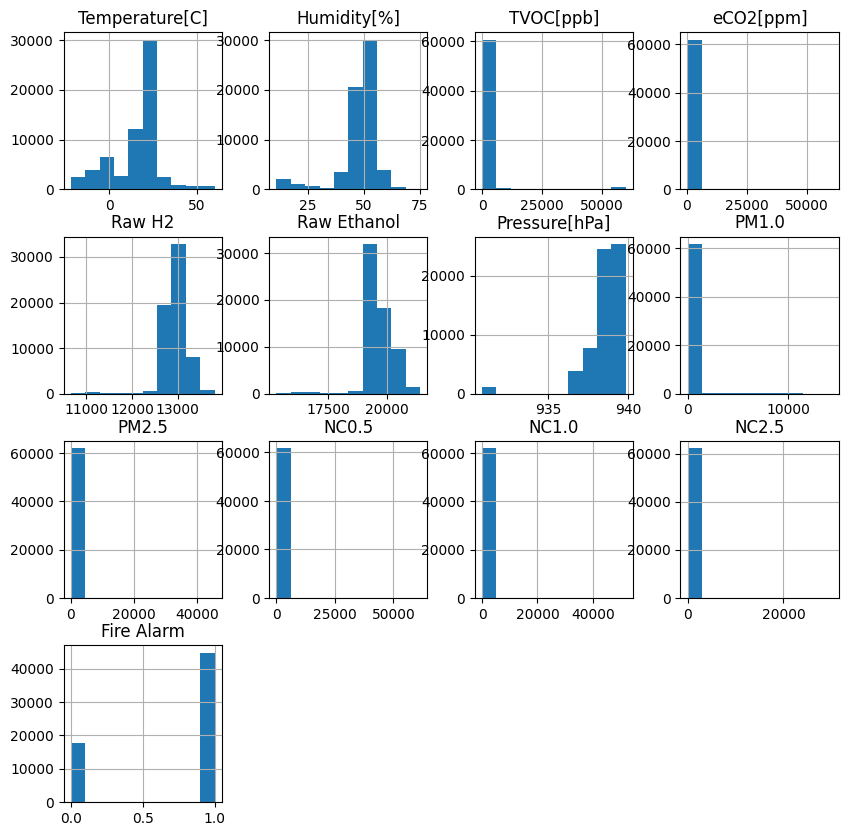

In [9]:
#histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

## Model Selection

### Analysis of Fire Alarm (Target Variable)

A Count plot and a Pie chart will be two useful plots to analyse the `Fire Alarm` column as it is a categorical feature. Usefulness in the sense, both the plots will allow us to observe the distribution of each category in the feature.

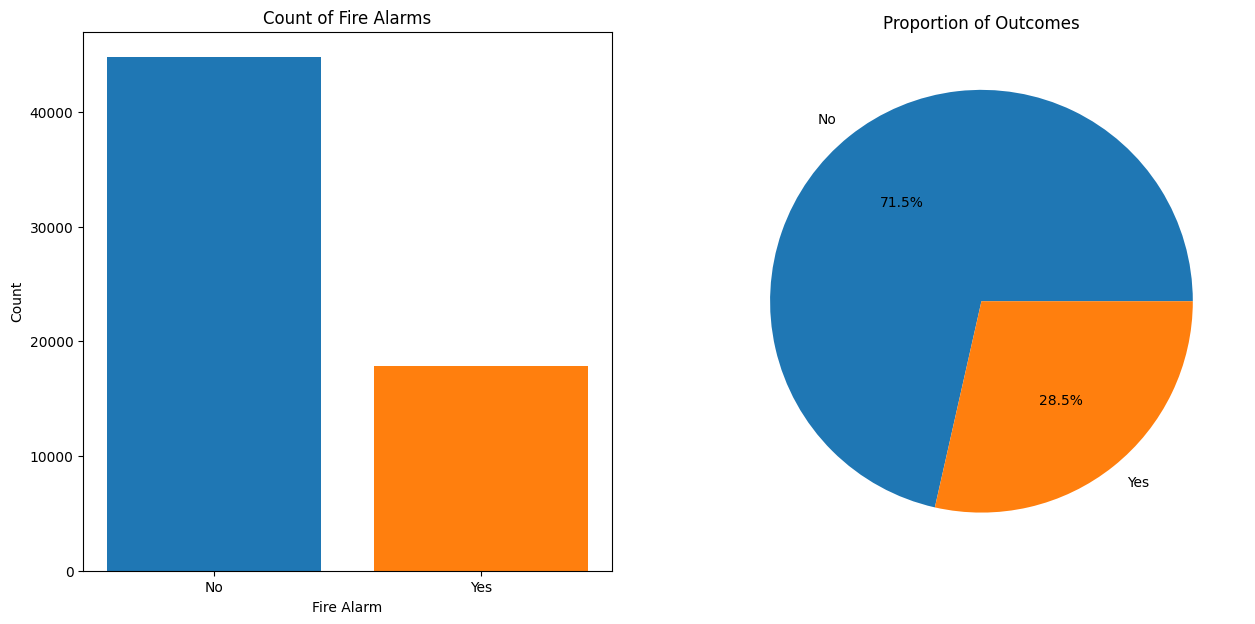

In [10]:
# Extract default colors
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot count plot on first axis
ax[0].bar([0, 1], df["Fire Alarm"].value_counts(), color=[colors[0], colors[1]])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["No", "Yes"])
ax[0].set_xlabel("Fire Alarm")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of Fire Alarms")

# Plot pie chart on second axis
values = df["Fire Alarm"].value_counts()
labels = ["No", "Yes"]
explode = [0.1, 0]
colors = ["blue", "orange"]
ax[1].pie(values, labels=labels, autopct="%1.1f%%")
ax[1].set_title("Proportion of Outcomes")

# Display the plot
plt.show()

The above plot shows that:

- **71.5% of smoke detection cases in the dataset do NOT have risk of fire.**
- **28.5% of smoke detection cases in the dataset has risk of fire.** 

Which is imbalanced result.

#### Rebalance Data

In [11]:
data_major = df[(df['Fire Alarm']==1)]
data_minor = df[(df['Fire Alarm']==0)]
upsample = resample(data_minor,
                    replace = True,
                    n_samples = len(data_major),
                    random_state= 42)
df_rebalanced = pd.concat([upsample, data_major])

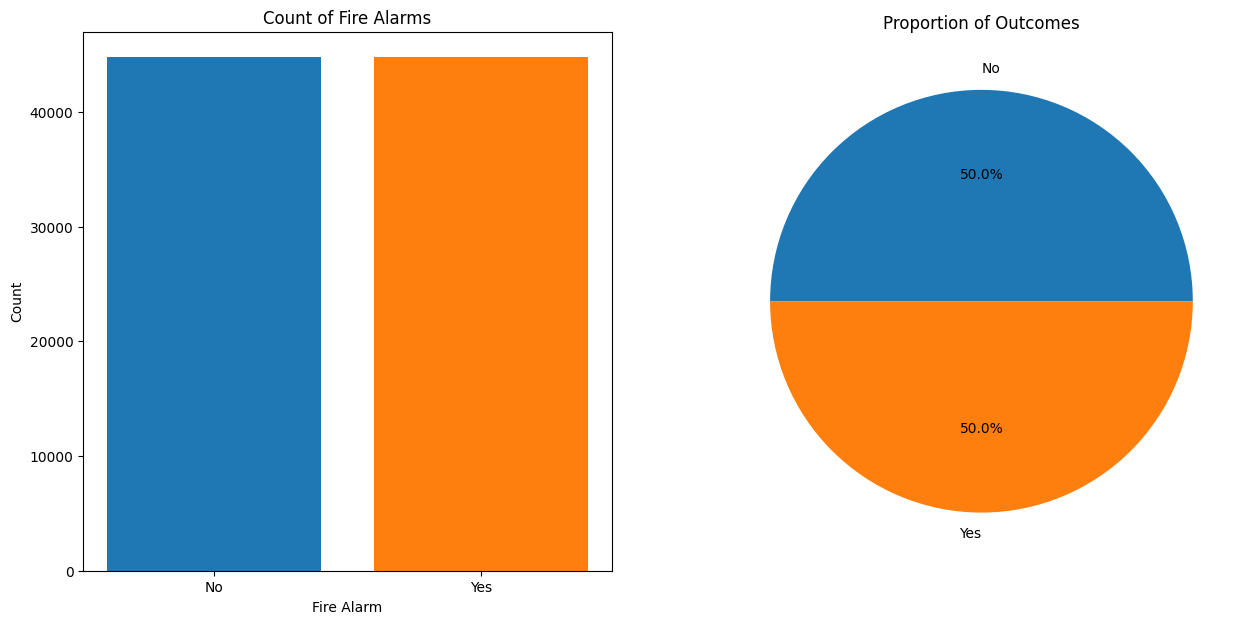

In [12]:
# Extract default colors
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot count plot on first axis
ax[0].bar([0, 1], df_rebalanced["Fire Alarm"].value_counts(), color=[colors[0], colors[1]])
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["No", "Yes"])
ax[0].set_xlabel("Fire Alarm")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of Fire Alarms")

# Plot pie chart on second axis
values = df_rebalanced["Fire Alarm"].value_counts()
labels = ["No", "Yes"]
explode = [0.1, 0]
colors = ["blue", "orange"]
ax[1].pie(values, labels=labels, autopct="%1.1f%%")
ax[1].set_title("Proportion of Outcomes")

# Display the plot
plt.show()

## Split the data into train and test sets

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Fire Alarm", axis=1), df["Fire Alarm"], test_size=0.2)
X_train_rebalanced, X_test_rebalanced, y_train_rebalanced, y_test_rebalanced = train_test_split(
    df_rebalanced.drop("Fire Alarm", axis=1), 
    df_rebalanced["Fire Alarm"], 
    test_size=0.2)

In [14]:
X_train.shape, X_test.shape

((50104, 12), (12526, 12))

In [15]:
X_train_rebalanced.shape, X_test_rebalanced.shape

((71611, 12), (17903, 12))

## Normalize the data

In [16]:
# Normalization
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)
X_train_rebalanced_norm = sc.fit_transform(X_train_rebalanced)
X_test_rebalanced_norm = sc.transform(X_test_rebalanced)

## Create feature selection

In [17]:
select_feature = SelectKBest(f_classif, k=10).fit(X_train, y_train)
X_train_norm_selected = select_feature.transform(X_train_norm)
X_test_norm_selected = select_feature.transform(X_test_norm)

In [18]:
select_rebalanced_feature = SelectKBest(f_classif, k=10).fit(X_train_rebalanced, y_train_rebalanced)
X_train_rebalanced_norm_selected = select_rebalanced_feature.transform(X_train_rebalanced_norm)
X_test_rebalanced_norm_selected = select_rebalanced_feature.transform(X_test_rebalanced_norm)

## Train and evaluate different models with and without feature selection

In [19]:
score_norm = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm,y_train,X_test_norm,y_test, score_norm)

Model: LogisticRegression
Accuracy: 89.717%
Run time: 0.673
------------------------------------------
Model: KNeighborsClassifier
Accuracy: 99.848%
Run time: 3.23
------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 100.000%
Run time: 0.332
------------------------------------------


In [20]:
score_norm_selected = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_norm_selected,y_train,X_test_norm_selected,y_test, score_norm_selected)

Model: LogisticRegression
Accuracy: 89.717%
Run time: 0.869
------------------------------------------
Model: KNeighborsClassifier
Accuracy: 99.848%
Run time: 1.55
------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 100.000%
Run time: 0.165
------------------------------------------


In [21]:
score_rebalanced_norm = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_rebalanced_norm,y_train_rebalanced,
                         X_test_rebalanced_norm,y_test_rebalanced, score_rebalanced_norm)

Model: LogisticRegression
Accuracy: 90.840%
Run time: 0.441
------------------------------------------
Model: KNeighborsClassifier
Accuracy: 99.877%
Run time: 2.35
------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 99.983%
Run time: 0.244
------------------------------------------


In [22]:
score_rebalanced_norm_selected = {"model":[],"accuracy":[],"precision":[],"recall":[],"f1":[],"run-time":[],}
for name in Models:
    model = Models[name]
    train_evaluate_model(name, model,X_train_rebalanced_norm_selected,y_train_rebalanced,
                         X_test_rebalanced_norm_selected,y_test_rebalanced, score_rebalanced_norm_selected)

Model: LogisticRegression
Accuracy: 90.840%
Run time: 0.446
------------------------------------------
Model: KNeighborsClassifier
Accuracy: 99.877%
Run time: 2.18
------------------------------------------
Model: DecisionTreeClassifier
Accuracy: 99.983%
Run time: 0.241
------------------------------------------


In [23]:
t1 = display_score(score_norm)
t2 = display_score(score_norm_selected)
print("Result before data resampling")
display_tables_side_by_side(t1, "Without Feature Selection", t2, "With Feature Selection")

Result before data resampling


model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.90,0.90,0.96,0.93,0.67
KNeighborsClassifier,1.00,1.00,1.00,1.00,3.23
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.33
model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.90,0.90,0.96,0.93,0.87
KNeighborsClassifier,1.00,1.00,1.00,1.00,1.55
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.16


In [24]:
t1 = display_score(score_rebalanced_norm)
t2 = display_score(score_rebalanced_norm_selected)
print("Result after data resampling")
display_tables_side_by_side(t1, "Without Feature Selection", t2, "With Feature Selection")

Result after data resampling


model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.91,0.91,0.90,0.91,0.44
KNeighborsClassifier,1.00,1.00,1.00,1.00,2.35
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.24
model,accuracy,precision,recall,f1,run-time
LogisticRegression,0.91,0.91,0.90,0.91,0.45
KNeighborsClassifier,1.00,1.00,1.00,1.00,2.18
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.24


## Conclusion
In this study, we investigated the impact of data preprocessing techniques, including normalization, feature selection, and data resampling, on enhancing the performance of machine learning models in the context of imbalanced datasets. Our results demonstrate that these preprocessing steps improve model accuracy, precision, recall, and F1 score across different classification algorithms. Data normalization helped standardize the features, ensuring each feature contributes proportionally to the model's decision-making process and improved accuracy and computational efficiency, particularly in models like Logistic Regression and K-Nearest Neighbors.

Moreover, feature selection techniques proved effective in reducing the dimensionality of the dataset while retaining its discriminatory power, thus improving the models' generalization ability and reducing overfitting. By selecting a subset of informative features, the models could focus on the most relevant aspects of the data, resulting in comparable or even superior performance compared to using the entire feature set, which highlights the importance of feature engineering in optimizing model performance, especially in scenarios with high-dimensional datasets.

Additionally, our exploration of data resampling techniques effectively addressed class imbalance issues, particularly when one class is significantly underrepresented. By rebalancing the distribution of classes through oversampling or undersampling, we provided the models with a more representative training set, leading to improved performance metrics across all evaluated algorithms. Overall, our findings underscore the significance of thoughtful data preprocessing in mitigating the challenges of imbalanced datasets and improving the robustness and efficacy of machine learning models in real-world applications.